In [2]:
from fyers_api import accessToken
from fyers_api.Websocket import ws
import pandas as pd
from fyers_api import accessToken
from fyers_api import fyersModel
import os
import math
import datetime
import csv

In [3]:
client_id='TAZ287TZUA-100'
secret_id='PPZ5ZG1YAR'
url='https://www.google.com/'
response_type = "code"
grant_type = "authorization_code"

In [4]:
session=accessToken.SessionModel(
    client_id=client_id,
    secret_key=secret_id,
    redirect_uri=url, 
    response_type=response_type,
    grant_type=grant_type
)

response = session.generate_authcode()
print(response)

https://api.fyers.in/api/v2/generate-authcode?client_id=TAZ287TZUA-100&redirect_uri=https%3A%2F%2Fwww.google.com%2F&response_type=code&state=None


In [5]:
auth_code='eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkubG9naW4uZnllcnMuaW4iLCJpYXQiOjE2OTU3MzI1NDUsImV4cCI6MTY5NTc2MjU0NSwibmJmIjoxNjk1NzMxOTQ1LCJhdWQiOiJbXCJ4OjBcIiwgXCJ4OjFcIiwgXCJ4OjJcIiwgXCJkOjFcIiwgXCJkOjJcIiwgXCJ4OjFcIiwgXCJ4OjBcIl0iLCJzdWIiOiJhdXRoX2NvZGUiLCJkaXNwbGF5X25hbWUiOiJYTTA0MzQyIiwib21zIjoiSzEiLCJoc21fa2V5IjoiNWI3Mzg3ZTYxOGQzODllNGVjOGVmZjU1ODM0ZTBmMTA1NjdjYWU1ODk5YWQ5NWY3MzgxMTM3YTMiLCJub25jZSI6IiIsImFwcF9pZCI6IlRBWjI4N1RaVUEiLCJ1dWlkIjoiZDMzZTMzZjE0OWUzNGM4ZjhiYWVjN2FmMTk4YWIwZGEiLCJpcEFkZHIiOiIwLjAuMC4wIiwic2NvcGUiOiIifQ.ob1J4SUCHfJ84pWErdVcCsBnoJs3ID83ln5k5BYGGzM'

In [6]:
session.set_token(auth_code)
response = session.generate_token()
print(response)

{'s': 'ok', 'code': 200, 'message': '', 'access_token': 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE2OTU3MzI1NjIsImV4cCI6MTY5NTc3NDYyMiwibmJmIjoxNjk1NzMyNTYyLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbEV0TlN6RWpKWjNYUkRtQWJRZnFkZFg4Sk9od3FNcDVTYm96M2l5c045RFg5b3dyV002eXhSTTNudFBKSmx6emNDcTduU2hZS3BJMnZxbWtvLThwTjhtaTVURnByVFhlMERReU95TUE1cEo0MksxST0iLCJkaXNwbGF5X25hbWUiOiJNT0hBTU1FRCBSQVlZQU4gU0FJVCIsIm9tcyI6IksxIiwiaHNtX2tleSI6IjViNzM4N2U2MThkMzg5ZTRlYzhlZmY1NTgzNGUwZjEwNTY3Y2FlNTg5OWFkOTVmNzM4MTEzN2EzIiwiZnlfaWQiOiJYTTA0MzQyIiwiYXBwVHlwZSI6MTAwLCJwb2FfZmxhZyI6Ik4ifQ.uN-vUczOO3JLazTXciwoAZ2fUQtJQOxwE-tyyAJ86iI', 'refresh_token': 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE2OTU3MzI1NjIsImV4cCI6MTY5Njk4NDIyMiwibmJmIjoxNjk1NzMyNTYyLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6InJlZnJlc2hfdG9rZW4iLCJhdF9oYXNoIjoiZ0FBQU

In [7]:
access_token=response['access_token']

In [8]:
fyers=fyersModel.FyersModel(client_id=client_id,token=access_token,log_path=os.getcwd())

In [20]:
symbol="NSE:SBIN-EQ"
data = {
    "symbol":symbol,
    "resolution":"5",
    "date_format":"1",
    "range_from":"2022-11-1",
    "range_to":"2022-11-30",
    "cont_flag":"1"
}

response = fyers.history(data=data)
print(response)

{'s': 'ok', 'candles': [[1667274300, 576.35, 578.0, 574.75, 575.3, 425241], [1667274600, 575.35, 575.95, 574.6, 575.25, 162656], [1667274900, 575.1, 577.9, 574.6, 577.8, 176147], [1667275200, 577.7, 583.9, 577.7, 582.7, 908230], [1667275500, 582.7, 583.0, 580.5, 581.7, 299142], [1667275800, 581.9, 583.8, 581.1, 583.7, 253927], [1667276100, 583.55, 585.75, 583.55, 584.8, 600128], [1667276400, 584.9, 585.0, 583.8, 584.4, 213710], [1667276700, 584.4, 584.7, 583.2, 583.4, 164364], [1667277000, 583.4, 584.45, 582.9, 583.0, 165055], [1667277300, 583.05, 583.05, 581.8, 582.1, 193741], [1667277600, 582.05, 582.25, 581.8, 581.85, 180716], [1667277900, 581.8, 582.3, 581.25, 581.3, 168247], [1667278200, 581.45, 582.0, 580.6, 580.75, 116629], [1667278500, 580.9, 581.35, 580.55, 581.1, 87205], [1667278800, 581.1, 581.2, 580.45, 580.65, 134235], [1667279100, 580.8, 580.8, 580.4, 580.4, 51814], [1667279400, 580.4, 581.8, 580.2, 581.8, 107414], [1667279700, 581.75, 581.95, 581.1, 581.15, 81419], [1667

In [21]:
candleSticks=response['candles']
#candleSticks=[]
#with open("./sbi.csv", 'r') as file:
 # csvreader = csv.reader(file)
  #for row in csvreader:
   # if(row[0]!='Time'):
    #  candleSticks.append([float(row[0]),float(row[1]),float(row[2]),float(row[3]),float(row[4]),float(row[5])])

In [22]:
closingValues=[]
candleSticksForDF=[]
for item in candleSticks:
    candleSticksForDF.append(item)
    closingValues.append(item[4])

In [23]:
valuesToPlot={'closingValues':closingValues,'candleStick':candleSticksForDF}
df = pd.DataFrame(valuesToPlot)
df

,closingValues,candleStick
0,575.30,"[1667274300, 576.35, 578.0, 574.75, 575.3, 425..."
1,575.25,"[1667274600, 575.35, 575.95, 574.6, 575.25, 16..."
2,577.80,"[1667274900, 575.1, 577.9, 574.6, 577.8, 176147]"
3,582.70,"[1667275200, 577.7, 583.9, 577.7, 582.7, 908230]"
4,581.70,"[1667275500, 582.7, 583.0, 580.5, 581.7, 299142]"
...,...,...
1570,602.80,"[1669800900, 601.45, 603.0, 601.45, 602.8, 789..."
1571,603.55,"[1669801200, 602.8, 603.55, 602.75, 603.55, 96..."
1572,603.45,"[1669801500, 603.5, 603.6, 603.45, 603.45, 887..."
1573,603.00,"[1669801800, 603.45, 603.5, 602.0, 603.0, 1043..."


In [24]:
small_lookback = 5
df['mean'] = df['closingValues'].ewm(span=5).mean()

In [25]:
import pandas as pd

# Assuming you have your price data in a DataFrame 'df' under the 'candleStick' column

# Define the window and standard deviation multiplier
window = 20  # You can adjust this window size as needed
std_dev_multiplier = 1.5  # Multiplier for standard deviation

# Calculate the rolling mean (SMA) and rolling standard deviation
df['SMA'] = df['candleStick'].apply(lambda x: pd.Series(x[4])).rolling(window=window).mean()
df['StdDev'] = df['candleStick'].apply(lambda x: pd.Series(x[4])).rolling(window=window).std()

# Calculate the upper and lower Bollinger Bands
df['Upper_Band'] = df['SMA'] + (std_dev_multiplier * df['StdDev'])
df['Lower_Band'] = df['SMA'] - (std_dev_multiplier * df['StdDev'])

# Print the resulting DataFrame 'df' with Bollinger Bands
print(df)

      closingValues                                        candleStick  \
0            575.30  [1667274300, 576.35, 578.0, 574.75, 575.3, 425...   
1            575.25  [1667274600, 575.35, 575.95, 574.6, 575.25, 16...   
2            577.80   [1667274900, 575.1, 577.9, 574.6, 577.8, 176147]   
3            582.70   [1667275200, 577.7, 583.9, 577.7, 582.7, 908230]   
4            581.70   [1667275500, 582.7, 583.0, 580.5, 581.7, 299142]   
...             ...                                                ...   
1570         602.80  [1669800900, 601.45, 603.0, 601.45, 602.8, 789...   
1571         603.55  [1669801200, 602.8, 603.55, 602.75, 603.55, 96...   
1572         603.45  [1669801500, 603.5, 603.6, 603.45, 603.45, 887...   
1573         603.00  [1669801800, 603.45, 603.5, 602.0, 603.0, 1043...   
1574         603.00  [1669802100, 602.95, 603.5, 602.5, 603.0, 857621]   

            mean       SMA    StdDev  Upper_Band  Lower_Band  
0     575.300000       NaN       NaN         NaN

In [26]:
counter=0
entryPrice=-420
stopLoss=-420
reward=3
buying=0
slCounter=0
tpCounter=0
eodCounter=0
for index, row in df.iterrows():
    if(buying==1):
        if(str(datetime.datetime.fromtimestamp(df['candleStick'][index][0]).time())=='15:15:00'):
            print(symbol+' EOD Exit at '+str(df['candleStick'][index][4]))
            eodCounter=eodCounter+((df['candleStick'][index][4]-entryPrice)/(entryPrice-stopLoss))
            counter=0
            entryPrice=-420
            stopLoss=-420
            reward=3
            buying=0
    
    if not math.isnan(df['mean'][index]):
        if not((df['mean'][index]<= df['candleStick'][index][2]) and (df['mean'][index]>= df['candleStick'][index][3])):
            if(buying!=1):
                if(df['mean'][index]<df['candleStick'][index][2]):
                    print(symbol+' Reference Candle '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                    entryPrice=df['candleStick'][index][3]
                    stopLoss=df['candleStick'][index][2]+0.2
        else:
            if(entryPrice!=-420 and stopLoss!=-420):
                if(buying==0):
                    print(symbol+' Sell Triggered at '+str(entryPrice)+' '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                    buying=1
                if(df['candleStick'][index][2]>=stopLoss):
                    print(symbol+' SL hit at '+str(stopLoss)+' '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                    buying=0
                    entryPrice=-420
                    stopLoss=-420
                    slCounter=slCounter+1
                    continue
                targetPrice=entryPrice+((entryPrice-stopLoss)*reward)
                if(df['candleStick'][index][3]<=targetPrice):
                    buying=0
                    print(symbol+' TP hit at '+str(targetPrice)+' '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                    tpCounter=tpCounter+1
                    entryPrice=-420
                    stopLoss=-420
      
print('TP:'+str(tpCounter*reward))
print('SL:'+str(slCounter*-1))
roundValueForEOD=round(eodCounter,3)
print('EOD:'+str(roundValueForEOD))
roundValueForNet=round(((tpCounter*reward)+(slCounter*-1)+(eodCounter)),3)
print('Net For Period='+ str(roundValueForNet))


NSE:SBIN-EQ Reference Candle 2022-11-01 09:35:00
NSE:SBIN-EQ Sell Triggered at 580.5 2022-11-01 09:40:00
NSE:SBIN-EQ SL hit at 583.2 2022-11-01 09:40:00
NSE:SBIN-EQ Reference Candle 2022-11-01 09:45:00
NSE:SBIN-EQ Reference Candle 2022-11-01 09:50:00
NSE:SBIN-EQ Sell Triggered at 583.8 2022-11-01 09:55:00
NSE:SBIN-EQ TP hit at 579.5999999999997 2022-11-01 12:30:00
NSE:SBIN-EQ Reference Candle 2022-11-01 13:20:00
NSE:SBIN-EQ Sell Triggered at 577.9 2022-11-01 13:25:00
NSE:SBIN-EQ SL hit at 578.6500000000001 2022-11-01 13:25:00
NSE:SBIN-EQ Reference Candle 2022-11-01 13:30:00
NSE:SBIN-EQ Reference Candle 2022-11-01 13:35:00
NSE:SBIN-EQ Sell Triggered at 578.5 2022-11-01 13:40:00
NSE:SBIN-EQ EOD Exit at 576.95
NSE:SBIN-EQ Reference Candle 2022-11-02 10:05:00
NSE:SBIN-EQ Sell Triggered at 576.9 2022-11-02 10:10:00
NSE:SBIN-EQ SL hit at 578.2 2022-11-02 10:10:00
NSE:SBIN-EQ Reference Candle 2022-11-02 10:15:00
NSE:SBIN-EQ Sell Triggered at 577.7 2022-11-02 10:20:00
NSE:SBIN-EQ TP hit at 573

<Axes: >

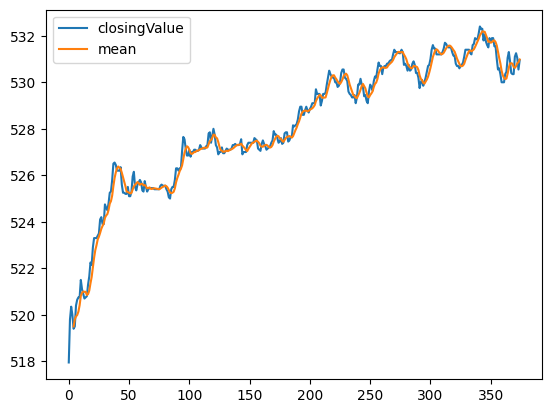

In [67]:
objForGraph={'closingValue':df['closingValues'],'mean':df['mean']}
dfToPlot = pd.DataFrame(objForGraph)
dfToPlot.plot()
